In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data sources: 
https://www.in2013dollars.com/bitcoin-price
https://en.wikipedia.org/wiki/Hyperinflation_in_the_Weimar_Republic#/media/File:Germany_Hyperinflation.svg

In [173]:
def wrangle(data):
    df = pd.read_csv(data)
    return df

In [174]:
marks = wrangle('./data/marks.csv')
bitcoin = wrangle('./data/bitcoin.csv')

In [175]:
marks['adj_year'] = marks['year'] - marks['year'].min()
marks = marks.sort_values(by='adj_year')
marks['price'] = marks['papermarks']

In [176]:
marks['papermarks'] = 10**marks['papermarks']

In [177]:
bitcoin['year'] = np.round(bitcoin['Year'] + ((bitcoin['Month'] - 1) / 12), 3)
bitcoin['adj_year'] = bitcoin['year'] - bitcoin['year'].min() -.5
bitcoin = bitcoin.sort_values(by='adj_year')
bitcoin['price'] = bitcoin['Bitcoin Price ($)']


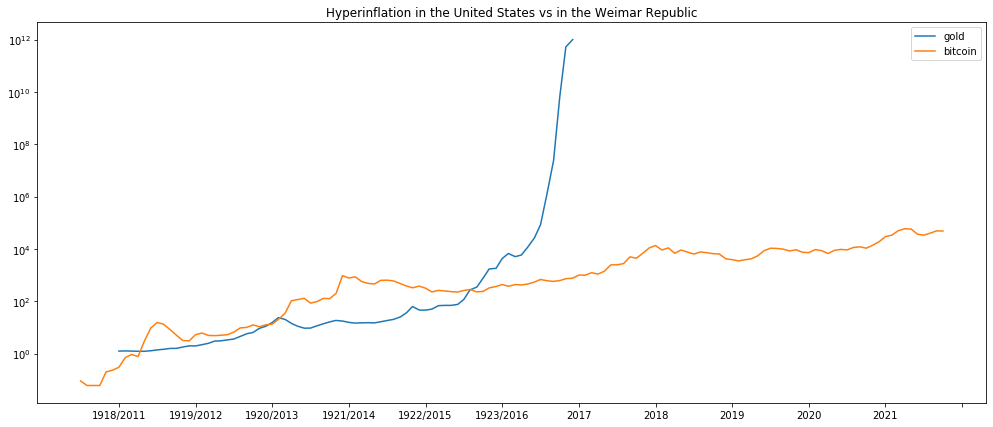

In [181]:
fig, ax = plt.subplots(figsize=(17, 7))
plt.plot(marks['adj_year'], marks['papermarks'])
plt.plot(bitcoin['adj_year'], bitcoin['Bitcoin Price ($)'])
plt.yscale('log')
plt.xticks(np.arange(0, 12, step=1), ['1918/2011', '1919/2012', '1920/2013', '1921/2014', '1922/2015', '1923/2016', '2017', '2018', '2019', '2020', '2021'])
plt.legend(['gold', 'bitcoin'])
plt.title('Hyperinflation in the United States vs in the Weimar Republic')
plt.show()


In [179]:
marks['type'] = 'marks'
bitcoin['type'] = 'bitcoin'
total = pd.concat([marks, bitcoin]).reset_index(drop=True)
total = total[['type', 'adj_year', 'price', 'year']]

In [180]:
total.to_csv('./data/adjusted.csv')